# This notebook compares the V15 and V20 prediction errors for different bitstrings

#### Load the data

In [1]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')


#### Create a plotting function

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

# 1. Lakes

,latitude_ERA,longitude_ERA,delta
38367,-2.388758,36.0000,5.396403
2272,-54.660397,-69.3750,2.445374
9220,-29.367672,139.6875,1.786335
101073,41.170945,-113.4000,1.784719
84857,31.615914,61.1200,1.663431


-0.4469764

1650

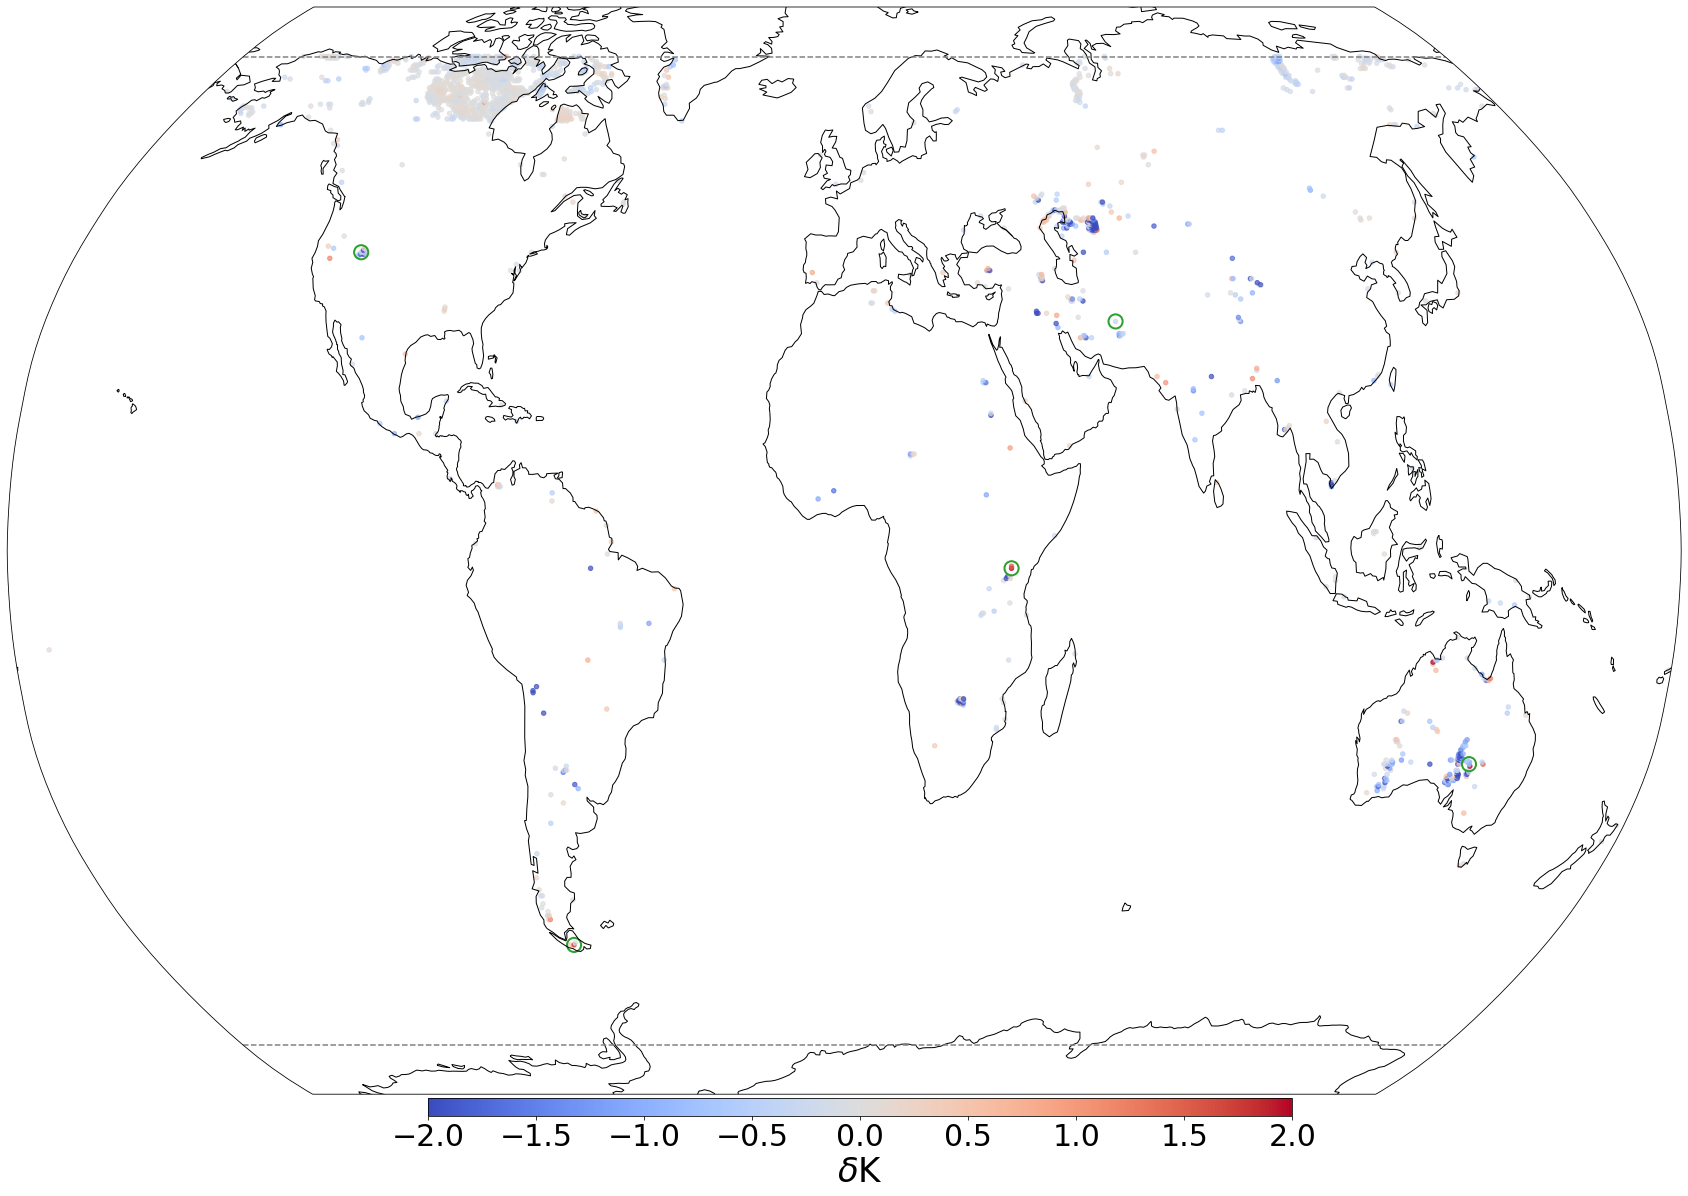

In [3]:
df_lake = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant')
n = 5
RobinsonPlot(df_lake,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake.deltaX.mean())
display(len(df_lake))

,latitude_ERA,longitude_ERA,delta
101073,41.170945,-113.40,1.784719
84857,31.615914,61.12,1.663431
71526,24.028095,69.00,1.604342
70081,23.185004,30.90,1.562348
100570,40.889915,-113.76,1.491879


-1.0953104

546

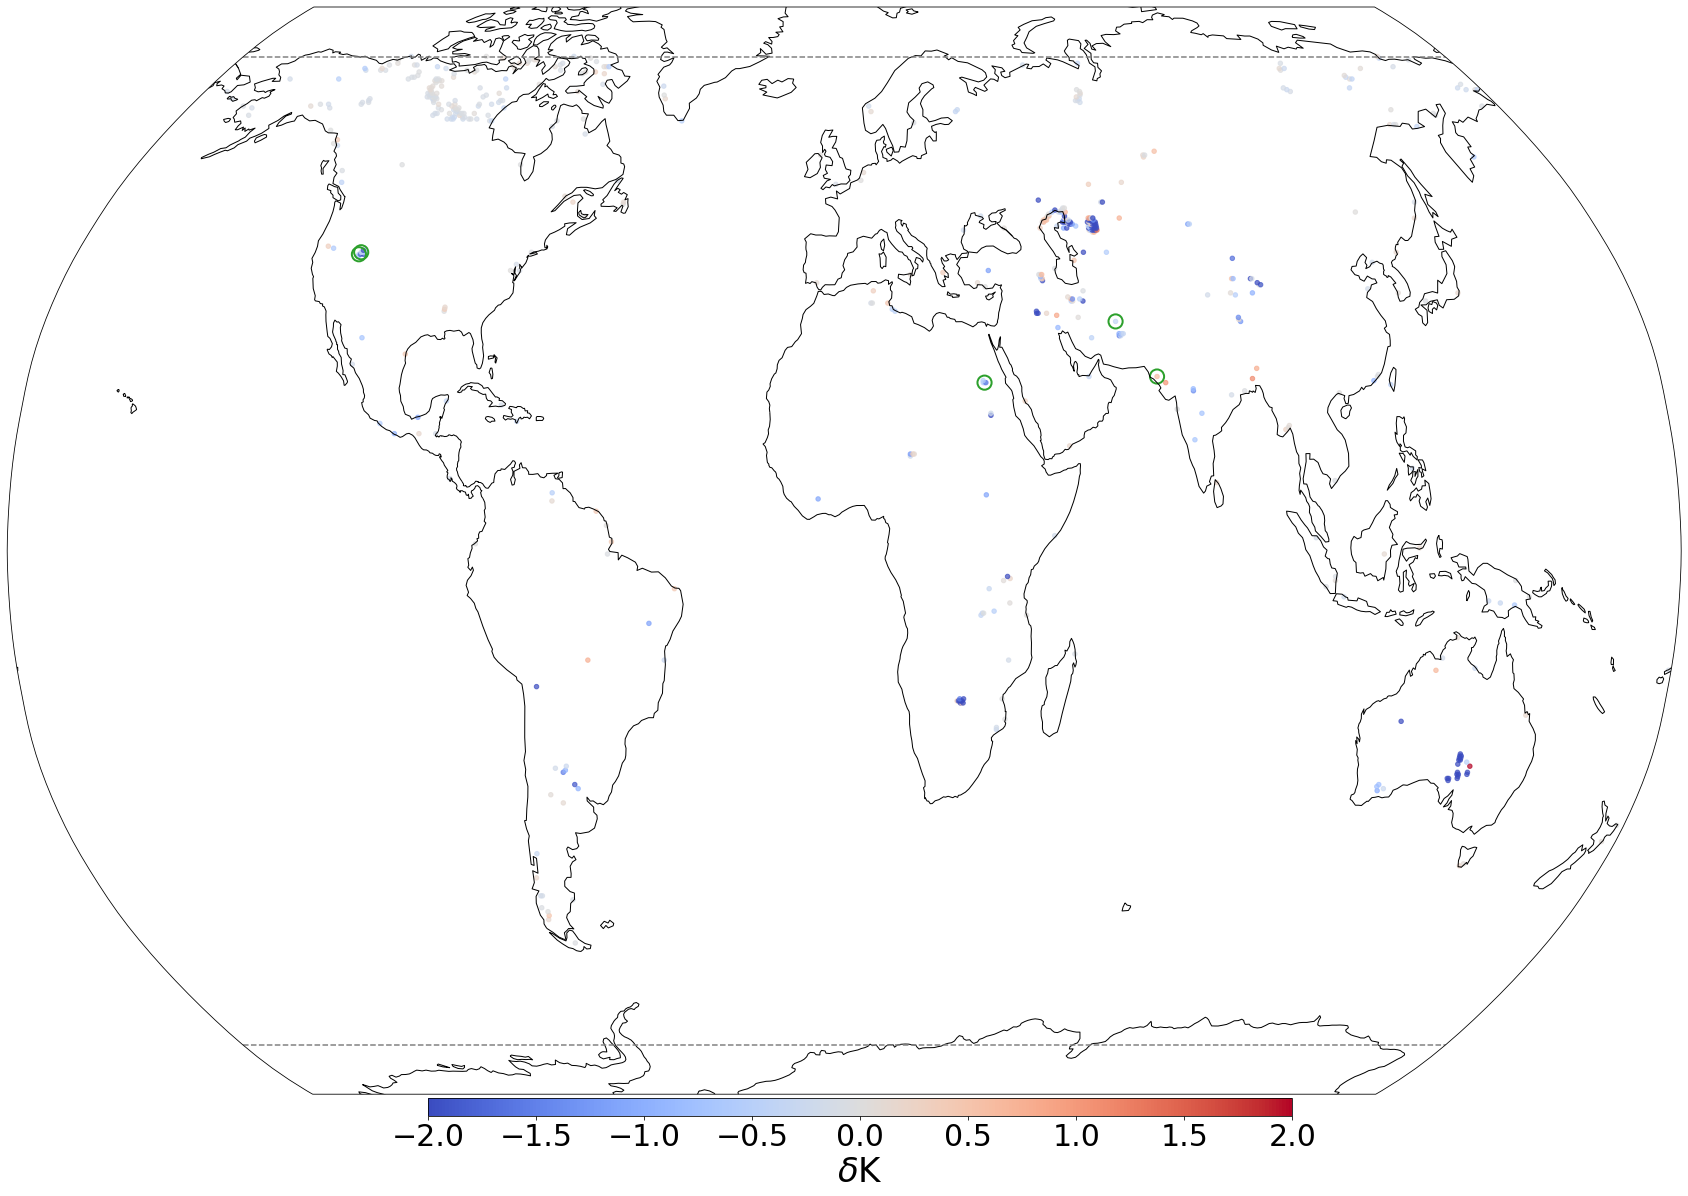

In [4]:
df_lake_ground = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')
n = 5
RobinsonPlot(df_lake_ground,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake_ground.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake_ground.deltaX.mean())
display(len(df_lake_ground))

# 2. Vegetation

,latitude_ERA,longitude_ERA,delta
30656,-8.852456,120.656250,4.530539
105108,43.419187,-4.125000,3.734607
86233,32.459005,34.880000,3.441413
54269,11.662760,102.937500,3.095105
3462,-42.576096,171.111111,2.250091


0.4946728

58

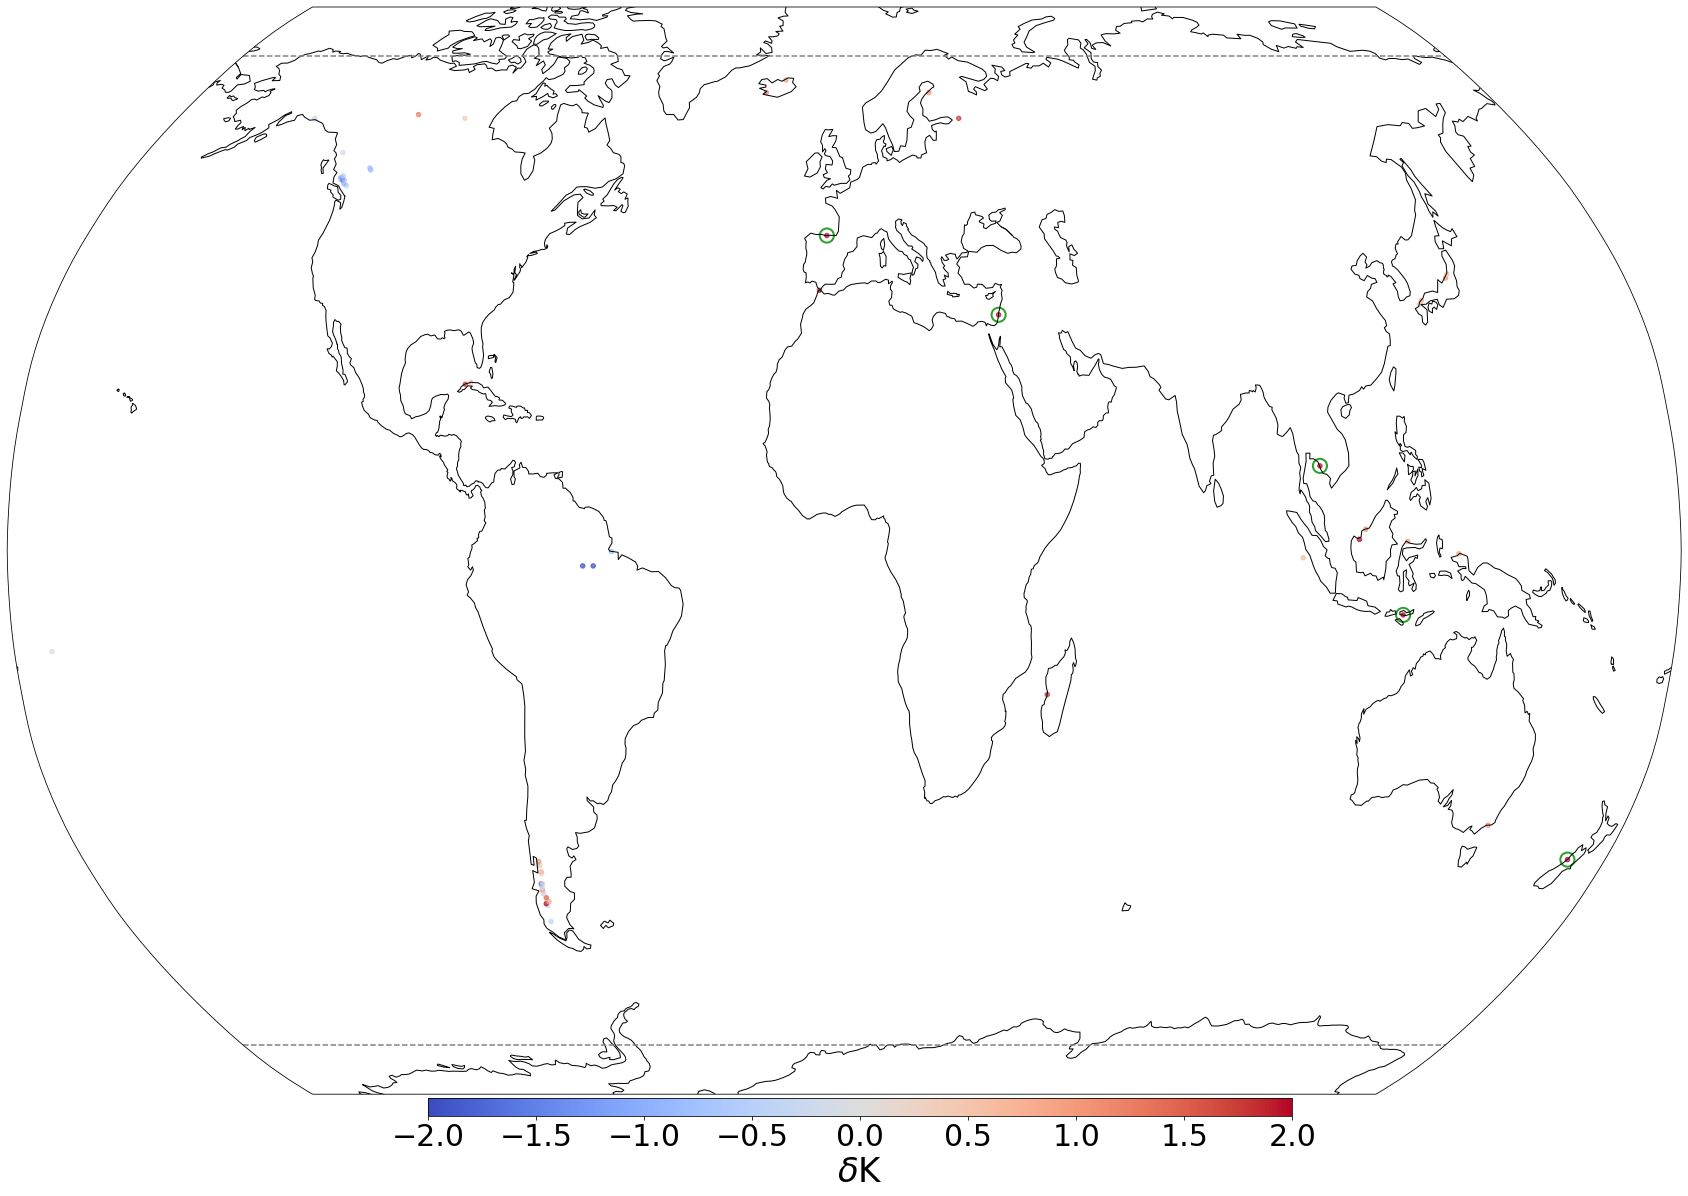

In [44]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant')
n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_veg.delta.mean())
display(len(df_veg))

# 3. Glacier

,latitude_ERA,longitude_ERA,delta
2328,-54.098337,-36.900000,3.715223
2174,-63.934391,-58.200000,3.533224
1903,-66.744690,109.333333,2.966166
2214,-61.967180,-57.937500,2.895869
6228,-33.021066,-70.080000,2.674545


-0.13505524

1057

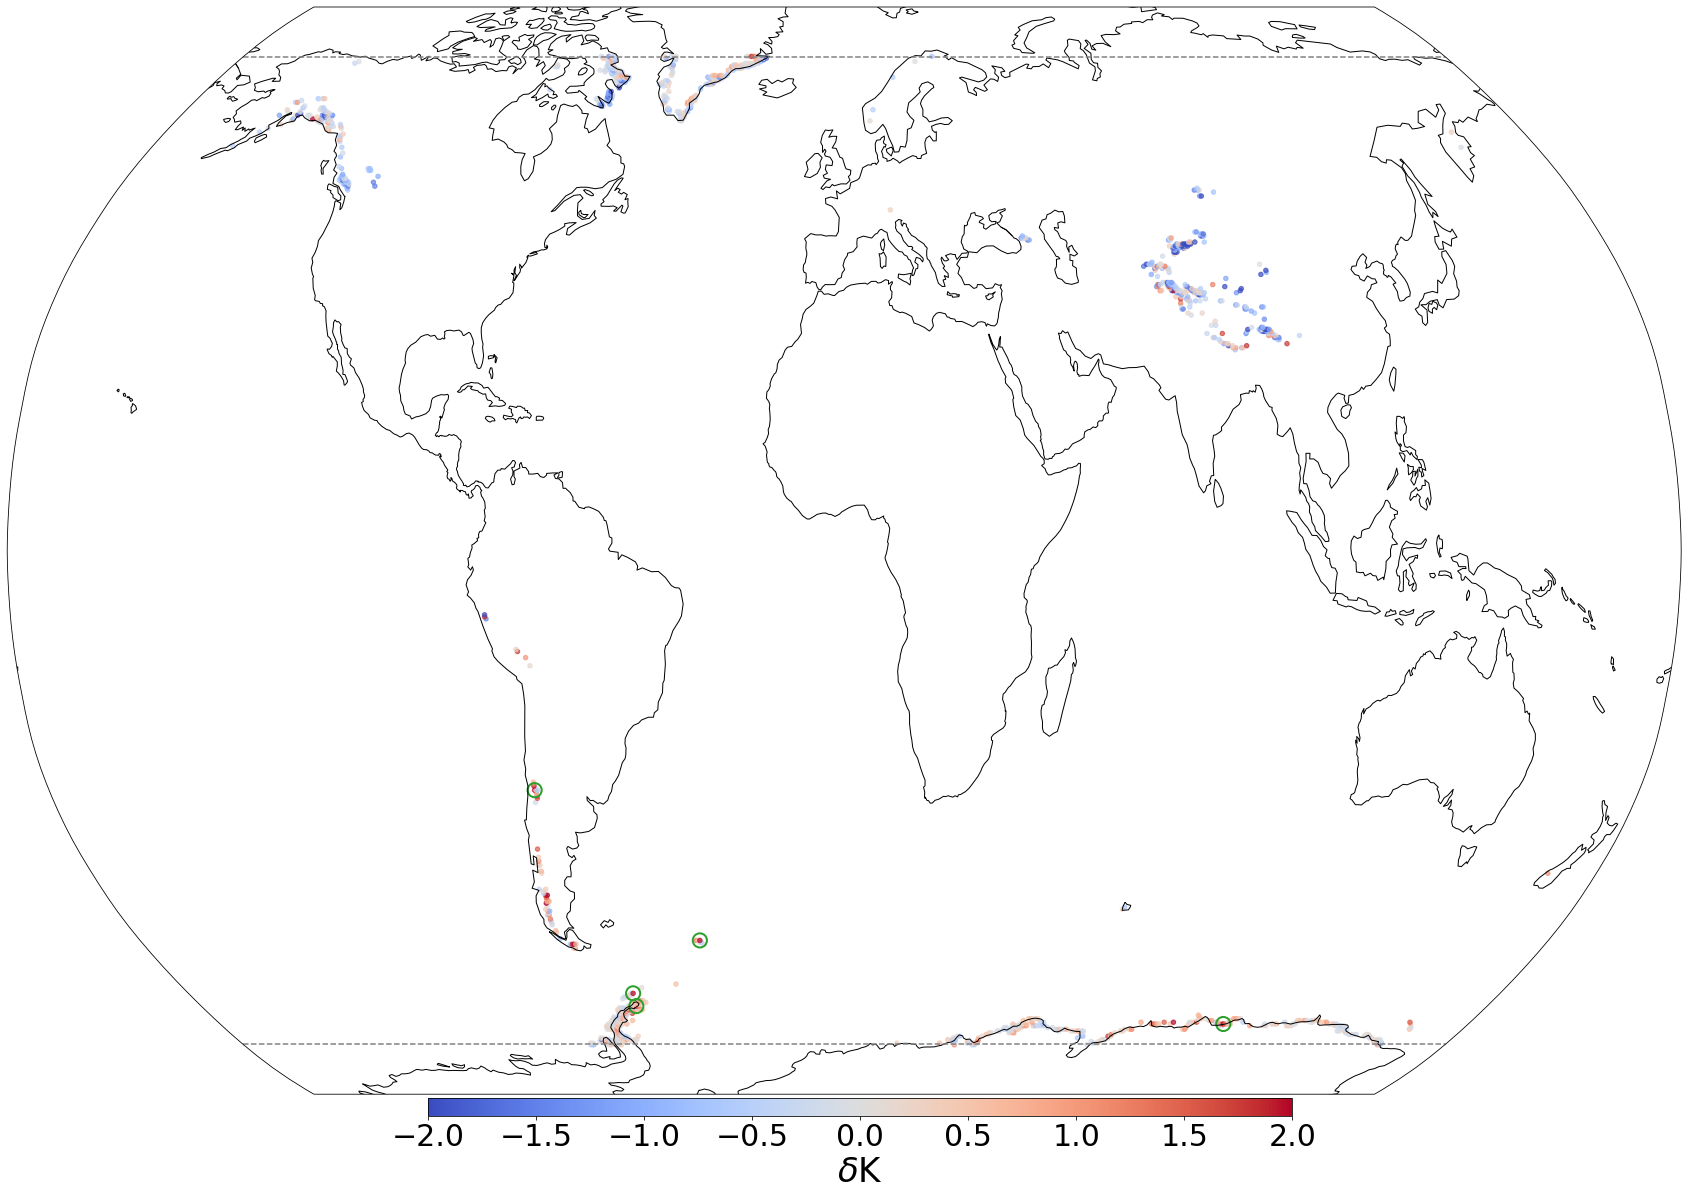

In [45]:
df_ice = df.query('si10Fr_change_is_significant ')
n = 5
RobinsonPlot(df_ice,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_ice.delta.mean())
display(len(df_ice))

# 4. Deep dive

Let look at some particular points in each of the categories

----







# OLD STUFF:

## Bitstring 100110 

In [4]:
df_1100110 = df.query('bitstring == "100110"')

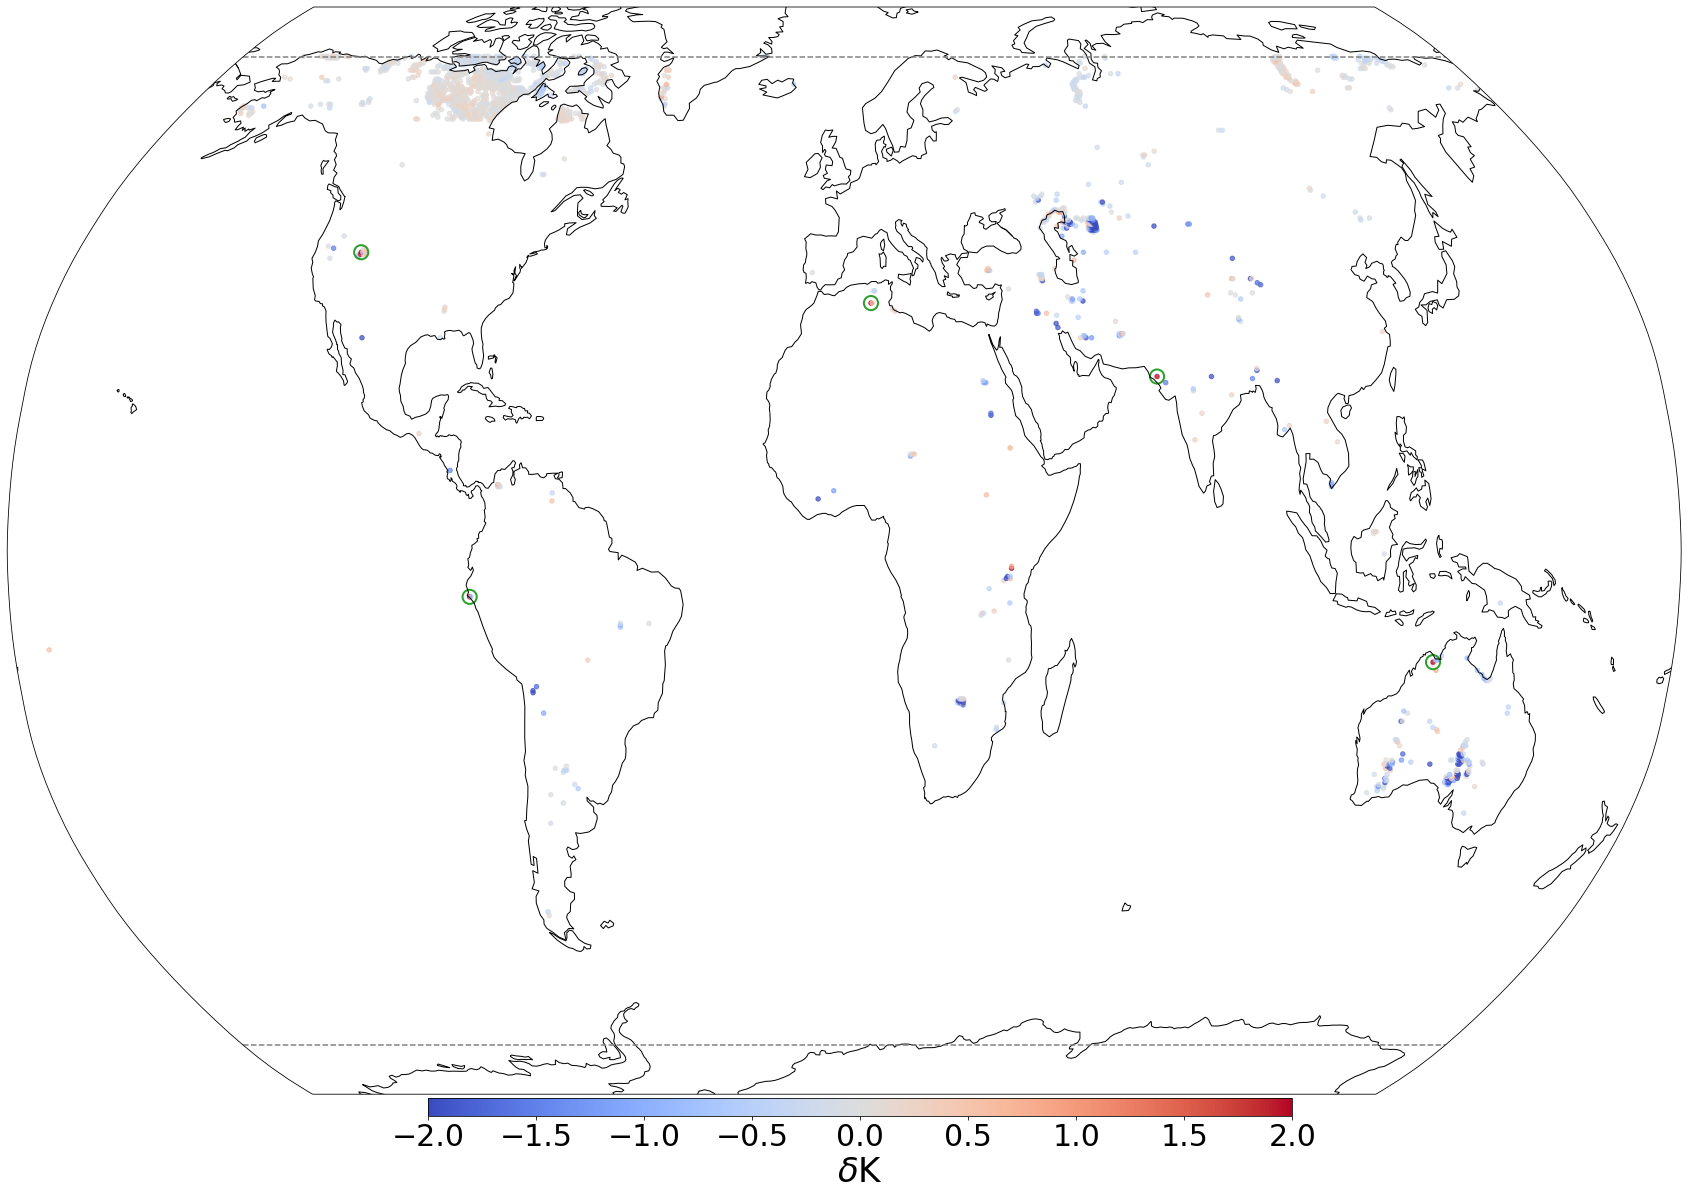

In [37]:
RobinsonPlot(df_1100110,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/bitstring_100110.png',ncircles=5)

#### Check out some of the worst points - these are mentioned in the manuscript

In [21]:
ivals = [0,1,2,3,4]  # #Gujarat, Salt lake city, Peru, Northern Algeria,Australia
i = 1
df_1100110.sort_values(by=['delta'],ascending=False).iloc[i]

latitude_ERA                        41.170945
longitude_ERA                          -113.4
MODIS_LST                          294.736176
V15_prediction                     294.245392
V20_prediction                     302.931915
V20X_prediction                    299.788849
V15_error                            3.573472
V20_error                              8.4504
V20X_error                           6.104148
delta                                4.876928
deltaX                               2.530676
values                                  94518
step                          0 days 00:00:00
surface                                   0.0
latitude                            41.170945
longitude                              -113.4
change_in_cl                        -0.530101
V15_cl                               0.530101
V20_cl                                    0.0
percentage_change_in_cl                  -1.0
heightAboveGround                        10.0
change_in_si10                    

In [22]:
ivals = [0,1,2,3,4]  # #Gujarat, Salt lake city, Peru, Northern Algeria,Australia
i = 2
df_1100110.sort_values(by=['delta'],ascending=False).iloc[i][['latitude_ERA','longitude_ERA','MODIS_LST','V15_prediction',
       'V20_prediction', 'V20X_prediction','V15_error','V20_error','V20X_error','delta','deltaX']]

latitude_ERA        -6.323183
longitude_ERA       -80.71875
MODIS_LST          311.564301
V15_prediction     308.391449
V20_prediction     304.894409
V20X_prediction    300.358093
V15_error            4.953901
V20_error            7.726332
V20X_error          11.876699
delta                 2.77243
deltaX               6.922798
Name: 33374, dtype: object

In [18]:
df_1100110.sort_values(by=['delta'],ascending=False).iloc[i].latitude_ERA

-15.316154469334318

In [20]:
df_1100110.sort_values(by=['delta'],ascending=False).iloc[i].longitude_ERA

127.96875

## Bitstring 000101 

In [15]:
df_000101 = df.query('bitstring == "000101"')

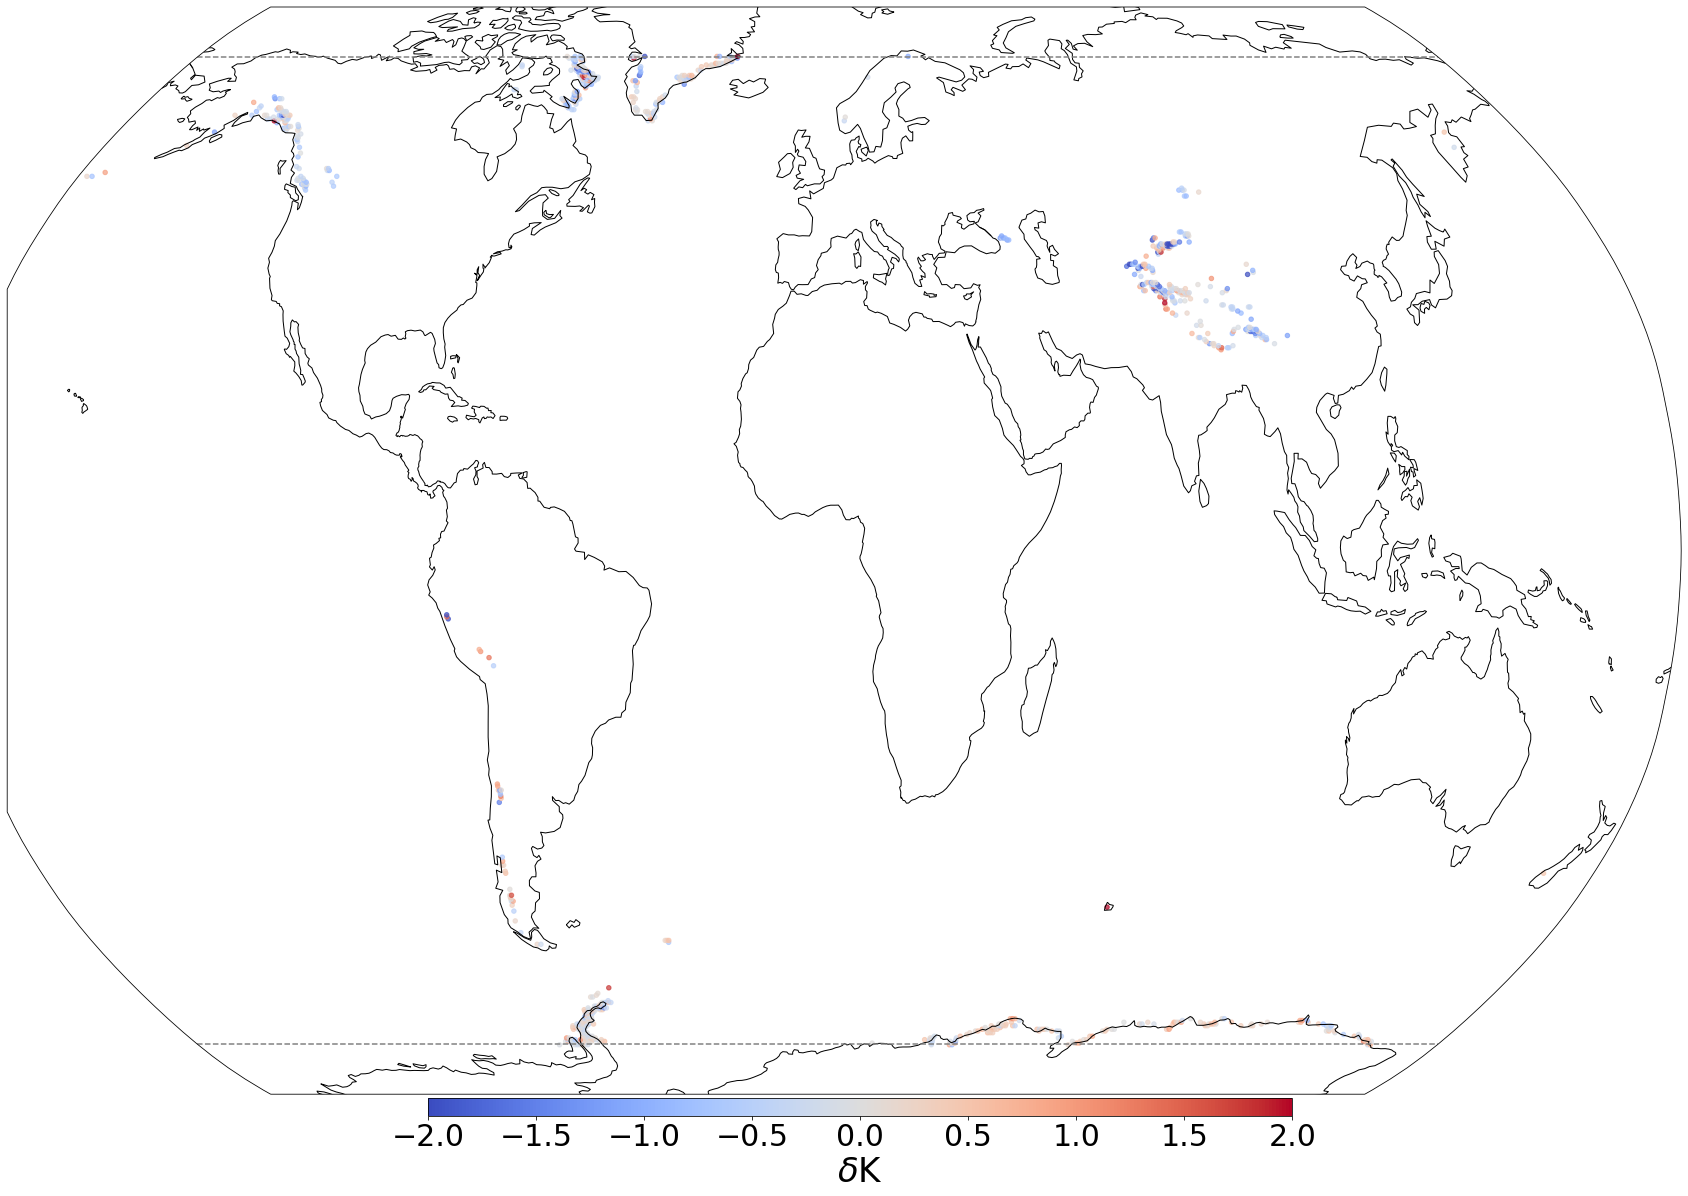

In [9]:
RobinsonPlot(df_000101,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/bitstring_000101.png')

In [18]:
#Alaskan gulf point
df_000101.sort_values(by=['delta'],ascending=False).iloc[0]

latitude_ERA                         59.99997
longitude_ERA                     -141.866667
MODIS_LST                          271.977448
V15_prediction                     277.694244
V20_prediction                     261.428802
V20X_prediction                    275.110748
V15_error                            6.214495
V20_error                           10.868941
V20X_error                           4.763571
delta                                4.654447
deltaX                              -1.450924
values                                  37428
step                          0 days 00:00:00
surface                                   0.0
latitude                             59.99997
longitude                         -141.866667
change_in_cl                          0.00121
V15_cl                                    0.0
V20_cl                                0.00121
percentage_change_in_cl                   inf
heightAboveGround                        10.0
change_in_si10                    

## Bitstring 010100 

In [55]:
df_010100 = df.query('bitstring == "010100"')

In [56]:
df_010100.sort_values(by=['delta'],ascending=False)#.iloc[4]

,latitude_ERA,longitude_ERA,MODIS_LST,V15_prediction,V20_prediction,V20X_prediction,V15_error,V20_error,V20X_error,delta,...,V15_dl,V20_dl,percentage_change_in_dl,cl_change_is_significant,si10_change_is_significant,cvh_change_is_significant,cvl_change_is_significant,lsm_change_is_significant,dl_change_is_significant,bitstring
141003,64.215421,23.750000,278.907043,277.626678,292.306549,279.692169,2.752890,13.399515,2.786702,10.646625,...,25.000000,12.540039,-0.498398,False,False,True,False,False,True,010100
89842,34.426218,131.333333,291.155426,292.753540,303.266937,291.036896,2.277692,12.111497,2.176783,9.833805,...,25.000000,33.124023,0.324961,False,False,True,False,False,True,010100
69458,22.903974,-83.400000,301.717712,302.266846,313.267120,302.097168,1.793129,11.549413,2.049138,9.756284,...,25.000000,298.899414,10.955976,False,False,True,False,False,True,010100
105121,43.419187,-4.125000,292.058167,292.966858,303.697815,294.145721,2.170567,11.639643,2.540581,9.469076,...,25.000000,240.665039,8.626601,False,False,True,False,False,True,010100
40088,-0.983606,98.718750,299.748657,299.439484,311.325012,300.483948,2.597664,11.576346,2.598799,8.978683,...,25.000000,128.749023,4.149961,False,False,True,False,False,True,010100
4389,-37.798581,148.666667,293.302094,291.919373,304.229431,295.274445,2.645613,10.927361,2.912897,8.281747,...,25.000000,33.034180,0.321367,False,False,True,False,False,True,010100
135369,60.843060,-115.555556,272.399689,273.635132,282.455261,271.013031,2.559674,10.070865,3.953590,7.511190,...,10.425781,16.338867,0.567160,False,False,True,False,False,True,010100
44374,2.950819,112.218750,302.328308,301.873413,311.749878,301.558868,2.602192,9.421556,2.369967,6.819364,...,25.000000,7.783203,-0.688672,False,False,True,False,False,True,010100
40808,-0.421546,132.187500,300.560242,297.746429,310.297333,300.102692,3.412266,9.773700,2.084944,6.361434,...,25.000000,573.608398,21.944336,False,False,True,False,False,True,010100
40928,-0.140515,-50.062500,301.993317,306.742126,312.982605,301.182617,4.794086,10.989294,2.396937,6.195209,...,25.000000,9.286133,-0.628555,False,False,True,False,False,True,010100
